## DATA PREPROCESSING

#### Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Demo = pd.read_excel("D:/BUM/N3_K1/Cap1/Telco_Customer_Churn.xlsx", sheet_name="Telco_Demo")
Services = pd.read_excel("D:/BUM/N3_K1/Cap1/Telco_Customer_Churn.xlsx", sheet_name="Telco_Services")
Status = pd.read_excel("D:/BUM/N3_K1/Cap1/Telco_Customer_Churn.xlsx", sheet_name="Telco_Status")

In [3]:
Services = pd.read_excel("D:/BUM/N3_K1/Cap1/Telco_Customer_Churn.xlsx", sheet_name="Telco_Services")

#### Customer_Demographics
- Drop column: Count, Under 30, Senior Citizen
- Add column: Age Range

In [4]:
Demo.head(10)

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1
5,4412-YLTKF,1,Female,72,No,Yes,No,Yes,1
6,0390-DCFDQ,1,Female,76,No,Yes,Yes,Yes,2
7,3445-HXXGF,1,Male,66,No,Yes,Yes,No,0
8,2656-FMOKZ,1,Female,70,No,Yes,No,Yes,2
9,2070-FNEXE,1,Female,77,No,Yes,No,Yes,2


In [5]:
Demo.duplicated().sum()

0

In [6]:
Demo.isna().sum().sort_values(ascending = False)

Customer ID             0
Count                   0
Gender                  0
Age                     0
Under 30                0
Senior Citizen          0
Married                 0
Dependents              0
Number of Dependents    0
dtype: int64

Drop columns

In [7]:
Demo = Demo.drop(["Count", "Under 30", "Senior Citizen"], axis=1)

Add column "Age Range"

In [8]:
Demo["Age Range"]= np.where(Demo['Age'] < 30, "Under 30", np.where(Demo['Age'] > 65, "Over 65", "From 30 To 65"))

In [9]:
Demo

,Customer ID,Gender,Age,Married,Dependents,Number of Dependents,Age Range
0,8779-QRDMV,Male,78,No,No,0,Over 65
1,7495-OOKFY,Female,74,Yes,Yes,1,Over 65
2,1658-BYGOY,Male,71,No,Yes,3,Over 65
3,4598-XLKNJ,Female,78,Yes,Yes,1,Over 65
4,4846-WHAFZ,Female,80,Yes,Yes,1,Over 65
...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,30,No,No,0,From 30 To 65
7039,6840-RESVB,Male,38,Yes,Yes,2,From 30 To 65
7040,2234-XADUH,Female,30,Yes,Yes,2,From 30 To 65
7041,4801-JZAZL,Female,32,Yes,Yes,2,From 30 To 65


#### Customer_Servies
- Drop columns: Count, Quarter, Offer

In [10]:
Services.duplicated().sum()

0

In [11]:
Services.isna().sum()

Customer ID                          0
Count                                0
Quarter                              0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Charges            

In [12]:
Services = Services.drop(["Count", "Quarter", "Offer"], axis=1)

In [13]:
Services

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,No,0,1,No,0.00,No,Yes,DSL,8,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,Yes,1,8,Yes,48.85,Yes,Yes,Fiber Optic,17,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,No,0,18,Yes,11.33,Yes,Yes,Fiber Optic,52,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,Yes,1,25,Yes,19.76,No,Yes,Fiber Optic,12,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,Yes,1,37,Yes,6.33,Yes,Yes,Fiber Optic,14,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,No,0,72,Yes,22.77,No,No,None,0,...,No,Two Year,Yes,Bank Withdrawal,21.15,1419.40,19.31,0,1639.44,3039.53
7039,6840-RESVB,Yes,1,24,Yes,36.05,Yes,Yes,Cable,24,...,Yes,One Year,Yes,Mailed Check,84.80,1990.50,48.23,0,865.20,2807.47
7040,2234-XADUH,Yes,4,72,Yes,29.66,Yes,Yes,Fiber Optic,59,...,Yes,One Year,Yes,Credit Card,103.20,7362.90,45.38,0,2135.52,9453.04
7041,4801-JZAZL,Yes,1,11,No,0.00,No,Yes,DSL,17,...,Yes,Month-to-Month,Yes,Bank Withdrawal,29.60,346.45,27.24,0,0.00,319.21


#### Customer_Status
- Drop columns: Count, Quarter
- Replace blank values in Churn Category, Churn Reason
- Add columns: Churn Score Category, CLTV Category

In [14]:
Status.duplicated().sum()

0

In [15]:
Status.isna().sum()

Customer ID              0
Count                    0
Quarter                  0
Satisfaction Score       0
Customer Status          0
Churn Label              0
Churn Value              0
Churn Score              0
CLTV                     0
Churn Category        5174
Churn Reason          5174
dtype: int64

Drop columns

In [16]:
Status = Status.drop(["Count", "Quarter"], axis=1)

Replace blanks

In [17]:
Status['Churn Category'] = np.where(Status['Churn Category'].isna() == True, "No churn", Status['Churn Category'])

In [18]:
Status['Churn Reason'] = np.where(Status['Churn Reason'].isna() == True, "No churn", Status['Churn Reason'])

Calculate Churn Score quantiles and add column Churn Score Category

In [19]:
arr = Status['Churn Score']
print("Q1 quantile of Churn Score: ", np.quantile(arr, .25))
print("Q2 quantile of Churn Score: ", np.quantile(arr, .50))
print("Q3 quantile of Churn Score: ", np.quantile(arr, .75))

Q1 quantile of Churn Score:  40.0
Q2 quantile of Churn Score:  61.0
Q3 quantile of Churn Score:  75.5


In [20]:
Status['Churn Score Category'] = Status.apply(lambda x: "Group 1" if x['Churn Score'] < 40 
                             else "Group 2" if x['Churn Score'] < 61 
                             else "Group 3" if x['Churn Score'] < 76
                             else "Group 4", axis = 1)

Calculate CLTV quantiles and add column CLTV Category

In [21]:
arr = Status['CLTV']
print("Q1 quantile of CLTV: ", np.quantile(arr, .25))
print("Q2 quantile of CLTV: ", np.quantile(arr, .50))
print("Q3 quantile of CLTV: ", np.quantile(arr, .75))

Q1 quantile of CLTV:  3469.0
Q2 quantile of CLTV:  4527.0
Q3 quantile of CLTV:  5380.5


In [22]:
Status['CLTV Category'] = Status.apply(lambda x: "Group 1" if x['CLTV'] < 3469 
                             else "Group 2" if x['CLTV'] < 4527 
                             else "Group 3" if x['CLTV'] < 5380.5
                             else "Group 4", axis = 1)

In [23]:
Status

,Customer ID,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason,Churn Score Category,CLTV Category
0,8779-QRDMV,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data,Group 4,Group 4
1,7495-OOKFY,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer,Group 3,Group 3
2,1658-BYGOY,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer,Group 4,Group 1
3,4598-XLKNJ,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services,Group 4,Group 3
4,4846-WHAFZ,2,Churned,Yes,1,67,2793,Price,Extra data charges,Group 3,Group 1
...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,5,Stayed,No,0,45,5306,No churn,No churn,Group 2,Group 3
7039,6840-RESVB,3,Stayed,No,0,59,2140,No churn,No churn,Group 2,Group 1
7040,2234-XADUH,4,Stayed,No,0,71,5560,No churn,No churn,Group 3,Group 4
7041,4801-JZAZL,4,Stayed,No,0,59,2793,No churn,No churn,Group 2,Group 1


#### Merge data into one table

In [24]:
data = Demo.merge(Services, on = 'Customer ID', how = 'inner').merge(Status, on = 'Customer ID', how = 'left')
data.head()

,Customer ID,Gender,Age,Married,Dependents,Number of Dependents,Age Range,Referred a Friend,Number of Referrals,Tenure in Months,...,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason,Churn Score Category,CLTV Category
0,8779-QRDMV,Male,78,No,No,0,Over 65,No,0,1,...,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data,Group 4,Group 4
1,7495-OOKFY,Female,74,Yes,Yes,1,Over 65,Yes,1,8,...,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer,Group 3,Group 3
2,1658-BYGOY,Male,71,No,Yes,3,Over 65,No,0,18,...,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer,Group 4,Group 1
3,4598-XLKNJ,Female,78,Yes,Yes,1,Over 65,Yes,1,25,...,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services,Group 4,Group 3
4,4846-WHAFZ,Female,80,Yes,Yes,1,Over 65,Yes,1,37,...,2,Churned,Yes,1,67,2793,Price,Extra data charges,Group 3,Group 1


## DATA EXPLORATION
- Phone, Internet, Unlimited data

In [25]:
print(data.columns.values)

['Customer ID' 'Gender' 'Age' 'Married' 'Dependents'
 'Number of Dependents' 'Age Range' 'Referred a Friend'
 'Number of Referrals' 'Tenure in Months' 'Phone Service'
 'Avg Monthly Long Distance Charges' 'Multiple Lines' 'Internet Service'
 'Internet Type' 'Avg Monthly GB Download' 'Online Security'
 'Online Backup' 'Device Protection Plan' 'Premium Tech Support'
 'Streaming TV' 'Streaming Movies' 'Streaming Music' 'Unlimited Data'
 'Contract' 'Paperless Billing' 'Payment Method' 'Monthly Charge'
 'Total Charges' 'Total Refunds' 'Total Extra Data Charges'
 'Total Long Distance Charges' 'Total Revenue' 'Satisfaction Score'
 'Customer Status' 'Churn Label' 'Churn Value' 'Churn Score' 'CLTV'
 'Churn Category' 'Churn Reason' 'Churn Score Category' 'CLTV Category']


In [26]:
service = ['Gender', 'Married', 'Dependents', 'Referred a Friend', 'Phone Service', 'Multiple Lines', 'Internet Service',
           'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
           'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Paperless Billing']
for a in range (1, len(service)):
    data[service[a]] = data.apply(lambda x: 1 if x[service[a]] == "Yes" 
                            else 0, axis = 1)

In [27]:
data['Internet Type'] = data.apply(lambda x: 1 if x['Internet Type'] == "DSL" 
                             else 2 if x['Internet Type'] == "Fiber Optic" 
                             else 3 if x['Internet Type'] == "Cable"
                             else 4, axis = 1)
                            
data['Contract'] = data.apply(lambda x: 1 if x['Contract'] == "Month-to-Month" 
                             else 2 if x['Contract'] == "One Year" 
                             else 3, axis = 1)

data['Payment Method'] = data.apply(lambda x: 1 if x['Payment Method'] == "Bank Withdrawal" 
                             else 2 if x['Payment Method'] == "Credit Card" 
                             else 3, axis = 1)

data['Age Range'] = data.apply(lambda x: 1 if x['Age Range'] == "Under 30" 
                             else 2 if x['Age Range'] == "From 30 To 65" 
                             else 3, axis = 1)
                            

In [48]:
data['NumberOfServices']=(data[['Phone Service', 'Multiple Lines','Internet Service', 'Online Security', 'Online Backup',
'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data']] == 1).sum(axis=1)

In [49]:
data

,Customer ID,Gender,Age,Married,Dependents,Number of Dependents,Age Range,Referred a Friend,Number of Referrals,Tenure in Months,...,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason,Churn Score Category,CLTV Category,NumberOfServices
0,8779-QRDMV,Male,78,0,0,0,3,0,0,1,...,Churned,Yes,1,91,5433,Competitor,Competitor offered more data,Group 4,Group 4,3
1,7495-OOKFY,Female,74,1,1,1,3,1,1,8,...,Churned,Yes,1,69,5302,Competitor,Competitor made better offer,Group 3,Group 3,5
2,1658-BYGOY,Male,71,0,1,3,3,0,0,18,...,Churned,Yes,1,81,3179,Competitor,Competitor made better offer,Group 4,Group 1,7
3,4598-XLKNJ,Female,78,1,1,1,3,1,1,25,...,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services,Group 4,Group 3,7
4,4846-WHAFZ,Female,80,1,1,1,3,1,1,37,...,Churned,Yes,1,67,2793,Price,Extra data charges,Group 3,Group 1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,30,0,0,0,2,0,0,72,...,Stayed,No,0,45,5306,No churn,No churn,Group 2,Group 3,1
7039,6840-RESVB,Male,38,1,1,2,2,1,1,24,...,Stayed,No,0,59,2140,No churn,No churn,Group 2,Group 1,10
7040,2234-XADUH,Female,30,1,1,2,2,1,4,72,...,Stayed,No,0,71,5560,No churn,No churn,Group 3,Group 4,9
7041,4801-JZAZL,Female,32,1,1,2,2,1,1,11,...,Stayed,No,0,59,2793,No churn,No churn,Group 2,Group 1,3


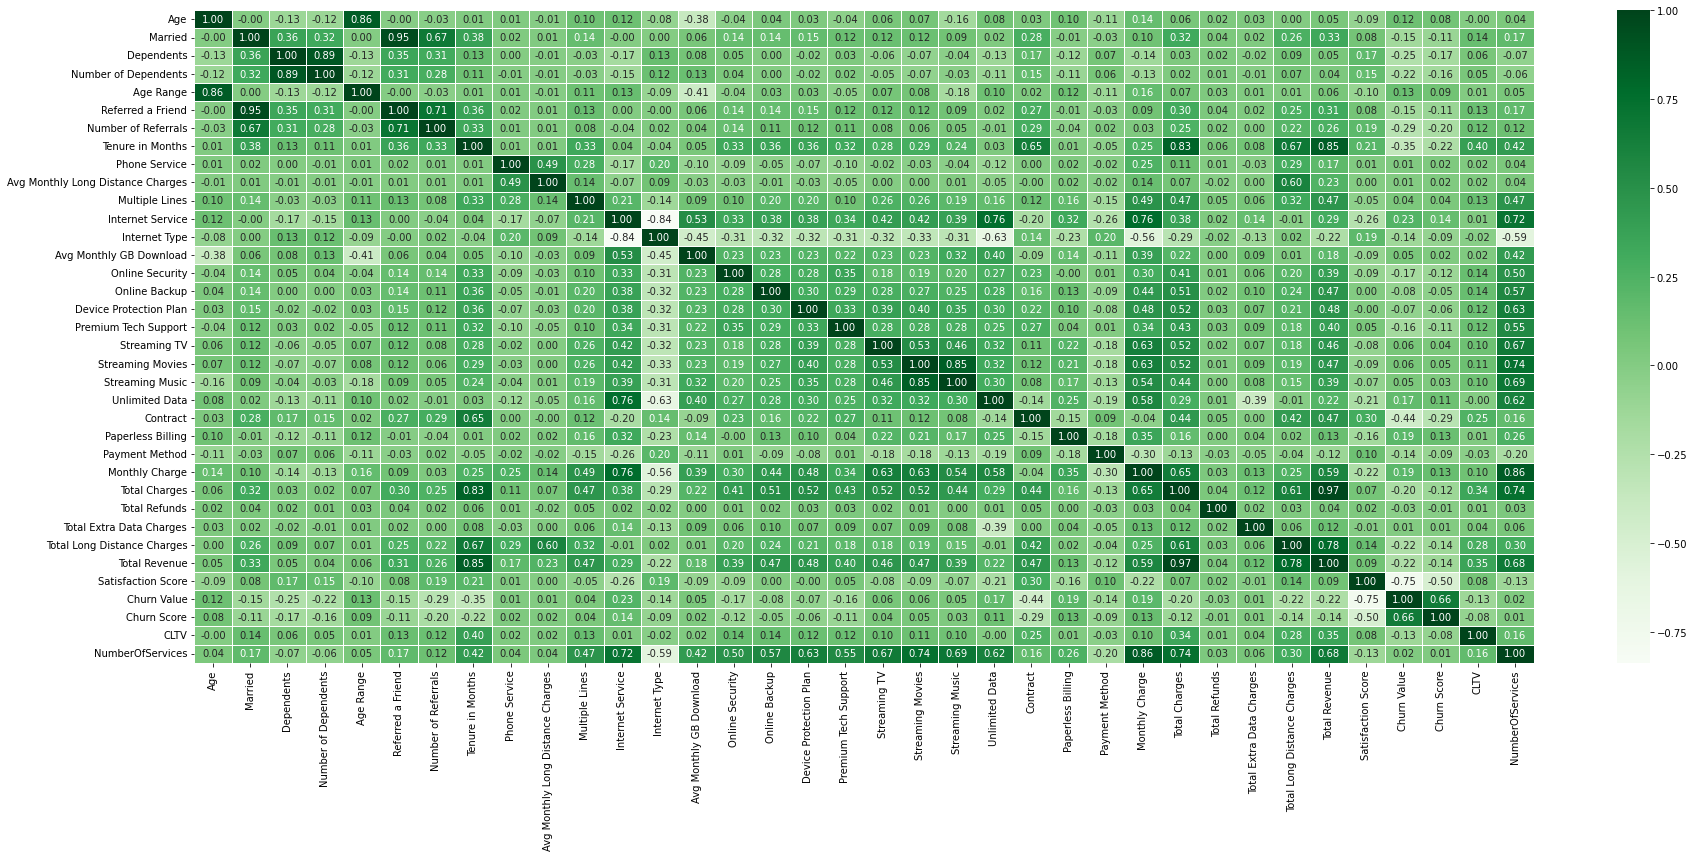

In [50]:
f, ax = plt.subplots(figsize = (30, 12))
sns.heatmap(data.corr(), annot = True, ax = ax, lw = 1, linecolor = 'white', fmt = '.2f', cmap="Greens")
plt.show();

## BUILD MODELS

#### Feature selection

In [29]:
model = data.copy()
y = model['Churn Value']
X = model.drop(columns=['Customer ID', 'Gender', 'Age', 'Total Charges', 'Total Refunds','Total Extra Data Charges', 'Total Long Distance Charges',
                        'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 
                        'Device Protection Plan', 'Premium Tech Support', 'Payment Method', 'Internet Type', 'Customer Status', 'Churn Label', 'Churn Value',
                        'Churn Category', 'Churn Reason', 'Churn Score Category', 'CLTV Category'])

#### Data Scaling, Fitting, Splitting into Train Set and Test Set

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, f1_score, ConfusionMatrixDisplay, r2_score

In [31]:
SC = StandardScaler()
X = SC.fit_transform(X)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings("ignore")

In [34]:
clf_name = []
roc_auc = []
f1 = []
def model_eval(clf, y_test, y_pred):
    print(clf)
    print(classification_report(y_test, y_pred))
    cm=confusion_matrix(y_test, y_pred, labels=y_test.unique())
    disp = ConfusionMatrixDisplay(cm, display_labels=y_test.unique())
    disp.plot(cmap='summer')
    m1 = roc_auc_score(y_test, y_pred)
    m2 = f1_score(y_test, y_pred)
    print('ROC_AUC_Score: {:.04f}'.format(m1))
    print('F1 Score: {:.04f}'.format(m2))
    clf_name.append(clf)
    roc_auc.append(m1)
    f1.append(m2)

XGBoost
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1555
           1       0.97      0.96      0.96       558

    accuracy                           0.98      2113
   macro avg       0.98      0.97      0.98      2113
weighted avg       0.98      0.98      0.98      2113

ROC_AUC_Score: 0.9733
F1 Score: 0.9639


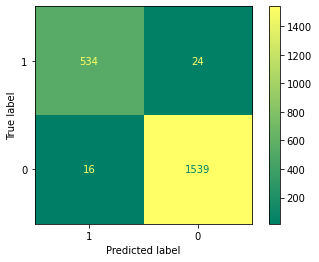

In [35]:
xgb_clf = XGBClassifier(n_estimators=500, max_depth=5, max_leaves=2, random_state=0)
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
clf = 'XGBoost'
model_eval(clf, y_test, y_pred)

accuracy= []
recall =[]
roc_auc= []
precision = []
FPR = []

from sklearn.metrics import recall_score, precision_score, confusion_matrix

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
roc_auc.append(round(roc_auc_score(y_test, y_pred),4))
precision.append(round(precision_score(y_test, y_pred),4))
cm = confusion_matrix(y_test, y_pred)
FPR.append(round(cm[0][1]/(cm[0][1]+cm[1][1]), 4))

model_names = ['XGBoost']
result1 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision, 'FPR': FPR}, index=model_names)

LogisticRegression
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1555
           1       0.96      0.95      0.95       558

    accuracy                           0.98      2113
   macro avg       0.97      0.97      0.97      2113
weighted avg       0.98      0.98      0.98      2113

ROC_AUC_Score: 0.9675
F1 Score: 0.9541


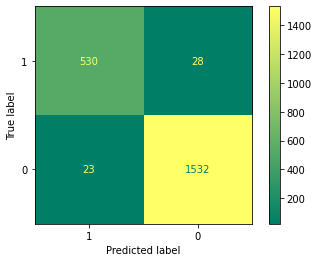

In [36]:
lr = LogisticRegression(max_iter=2000,penalty='l2')
lr=lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
clf = 'LogisticRegression'
model_eval(clf, y_test, y_pred)

accuracy= []
recall =[]
roc_auc= []
precision = []
FPR = []

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
roc_auc.append(round(roc_auc_score(y_test, y_pred),4))
precision.append(round(precision_score(y_test, y_pred),4))
cm = confusion_matrix(y_test, y_pred)
FPR.append(round(cm[0][1]/(cm[0][1]+cm[1][1]), 4))

model_names = ['Logistic Regression']
result2 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision, 'FPR': FPR}, index=model_names)

support vector machines
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1555
           1       0.96      0.95      0.95       558

    accuracy                           0.98      2113
   macro avg       0.97      0.97      0.97      2113
weighted avg       0.98      0.98      0.98      2113

ROC_AUC_Score: 0.9675
F1 Score: 0.9541


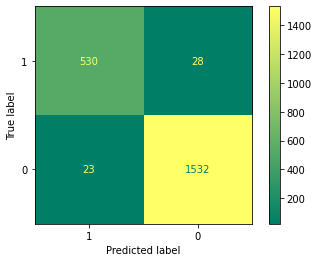

In [37]:
svm =LinearSVC()
svm=svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
clf = 'support vector machines'
model_eval(clf, y_test, y_pred)

accuracy= []
recall =[]
roc_auc= []
precision = []
FPR = []

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
roc_auc.append(round(roc_auc_score(y_test, y_pred),4))
precision.append(round(precision_score(y_test, y_pred),4))
cm = confusion_matrix(y_test, y_pred)
FPR.append(round(cm[0][1]/(cm[0][1]+cm[1][1]), 4))

model_names = ['SVM']
result3 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision, 'FPR': FPR}, index=model_names)

decision tree classifier
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1555
           1       0.95      0.95      0.95       558

    accuracy                           0.97      2113
   macro avg       0.97      0.97      0.97      2113
weighted avg       0.97      0.97      0.97      2113

ROC_AUC_Score: 0.9651
F1 Score: 0.9505


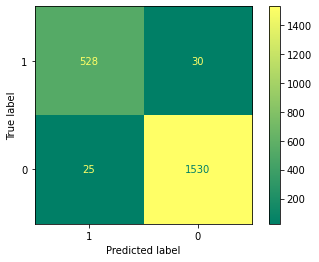

In [38]:
dt=DecisionTreeClassifier()
dt=dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
clf = 'decision tree classifier'
model_eval(clf, y_test, y_pred)

accuracy= []
recall =[]
roc_auc= []
precision = []
FPR = []

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
roc_auc.append(round(roc_auc_score(y_test, y_pred),4))
precision.append(round(precision_score(y_test, y_pred),4))
cm = confusion_matrix(y_test, y_pred)
FPR.append(round(cm[0][1]/(cm[0][1]+cm[1][1]), 4))

model_names = ['Decision Tree']
result4 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision, 'FPR': FPR}, index=model_names)

AdaBoostClassifier
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1555
           1       0.97      0.96      0.96       558

    accuracy                           0.98      2113
   macro avg       0.98      0.97      0.97      2113
weighted avg       0.98      0.98      0.98      2113

ROC_AUC_Score: 0.9742
F1 Score: 0.9632


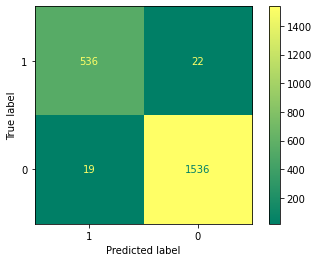

In [39]:
ada=AdaBoostClassifier()
ada=ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
clf = 'AdaBoostClassifier'
model_eval(clf, y_test, y_pred)

accuracy= []
recall =[]
roc_auc= []
precision = []
FPR = []

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
roc_auc.append(round(roc_auc_score(y_test, y_pred),4))
precision.append(round(precision_score(y_test, y_pred),4))
cm = confusion_matrix(y_test, y_pred)
FPR.append(round(cm[0][1]/(cm[0][1]+cm[1][1]), 4))

model_names = ['AdaBoost']
result5 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision, 'FPR': FPR}, index=model_names)

random forest classifier
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1555
           1       0.99      0.94      0.96       558

    accuracy                           0.98      2113
   macro avg       0.98      0.97      0.98      2113
weighted avg       0.98      0.98      0.98      2113

ROC_AUC_Score: 0.9696
F1 Score: 0.9643


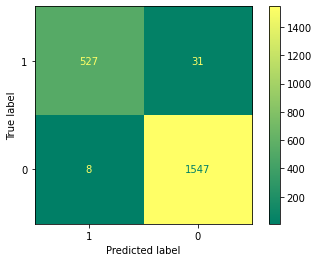

In [40]:
rfw=RandomForestClassifier()
rfw=rfw.fit(X_train, y_train)
y_pred = rfw.predict(X_test)
clf = 'random forest classifier'
model_eval(clf, y_test, y_pred)

accuracy= []
recall =[]
roc_auc= []
precision = []
FPR = []

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
roc_auc.append(round(roc_auc_score(y_test, y_pred),4))
precision.append(round(precision_score(y_test, y_pred),4))
cm = confusion_matrix(y_test, y_pred)
FPR.append(round(cm[0][1]/(cm[0][1]+cm[1][1]), 4))

model_names = ['Random Forest']
result6 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision, 'FPR': FPR}, index=model_names)

In [41]:
result_final= pd.concat([result1, result2, result3, result4, result5, result6],axis=0)
result_final

,Accuracy,Recall,Roc_Auc,Precision,FPR
XGBoost,0.9811,0.9570,0.9733,0.9709,0.0291
Logistic Regression,0.9759,0.9498,0.9675,0.9584,0.0416
SVM,0.9759,0.9498,0.9675,0.9584,0.0416
Decision Tree,0.9740,0.9462,0.9651,0.9548,0.0452
AdaBoost,0.9806,0.9606,0.9742,0.9658,0.0342
Random Forest,0.9815,0.9444,0.9696,0.9850,0.0150


In [42]:
export_csv = data.to_csv (r'CP1_Telco.csv', index = None, header=True)